In [1]:
import DataHandlers
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
# Demand data from previous spreadsheet planner | Exported 13 May 2019 @ 19:30
confirmed_fte = [17.00, 22.00, 25.50, 27.50, 30.00, 28.00, 30.50, 28.50, 32.00, 31.00, 37.50, 40.00, 39.00, 35.50, 30.00, 29.50, 27.00, 24.50, 24.00, 23.00, 22.50, 22.00, 17.50, 18.00, 18.00, 16.50, 17.50, 17.50, 17.50, 13.00, 12.00, 12.00, 12.00, 12.00, 11.00, 10.00, 10.00, 10.00, 9.00, 9.00, 9.00]

confirmed_fte = pd.Series(confirmed_fte, 
                          index=pd.date_range(start=pd.datetime(2018,11,1),end=pd.datetime(2022,3,31), freq='MS'),
                          name='spreadsheet confirmed')
confirmed_fte.index = confirmed_fte.index


unconfirmed_fte = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 6.50, 6.50, 6.50, 6.50, 7.50, 7.50, 6.50, 5.50, 5.50, 5.50, 5.50, 5.50, 8.00, 8.00, 8.00, 8.00, 8.50, 8.50, 7.50, 6.50, 6.50, 6.50, 6.50, 6.50, 0.50, 0.50, 0.00, 0.00, 0.00, 0.00, 0.00]

unconfirmed_fte = pd.Series(unconfirmed_fte, 
                          index=pd.date_range(start=pd.datetime(2018,11,1),end=pd.datetime(2022,3,31), freq='MS'),
                          name='spreadsheet unconfirmed')
unconfirmed_fte.index = confirmed_fte.index


total_fte = confirmed_fte + unconfirmed_fte

In [3]:
#start_date = fc.date_range.min()
#end_date = fc.date_range.max()

start_date = pd.datetime(2017,4,1)
end_date = pd.datetime(2022,3,31)
offset=15

In [4]:
# Load capacity data exported from previous spreadsheet planner 13 May 2019
capacity = pd.read_csv('reg_capacity.csv', index_col='Month')
capacity = capacity.T
capacity.index = pd.to_datetime(capacity.index, format='%b-%y')
capacity = capacity.loc[start_date:end_date]
capacity[1:10]

Month,REG Permanent capacity,REG FTC capacity,REG Associate capacity,University Partner capacity,Total capacity
2017-05-01,4.5,0.0,0.0,0.0,4.5
2017-06-01,5.5,0.0,0.0,0.0,5.5
2017-07-01,5.5,0.0,0.0,0.0,5.5
2017-08-01,5.5,0.0,0.0,0.0,5.5
2017-09-01,5.5,0.0,0.0,0.0,5.5
2017-10-01,6.0,0.0,0.0,0.0,6.0
2017-11-01,7.0,0.0,0.0,0.0,7.0
2017-12-01,8.5,0.0,0.0,0.0,8.5
2018-01-01,10.0,0.0,0.0,0.0,10.0


In [5]:
fc = DataHandlers.Forecast(data_source='csv')

## Bug?
Why does `resample('MS')` drop April 2017?

In [6]:
fc.project_reqs.sum(axis=1).loc[start_date:end_date][1:10]

2017-04-04    2.64375
2017-04-05    2.64375
2017-04-06    2.64375
2017-04-07    2.64375
2017-04-10    2.64375
2017-04-11    2.64375
2017-04-12    2.64375
2017-04-13    2.64375
2017-04-18    2.64375
dtype: float64

In [7]:
fc.project_reqs.sum(axis=1).loc[start_date:end_date].resample('MS').mean()[1:10]

2017-05-01    3.247500
2017-06-01    4.462500
2017-07-01    4.590000
2017-08-01    4.757500
2017-09-01    4.836250
2017-10-01    5.235000
2017-11-01    6.922500
2017-12-01    8.000461
2018-01-01    8.611250
Freq: MS, dtype: float64

In [8]:
reqs = fc.project_reqs.sum(axis=1)
reqs = DataHandlers.select_date_range(reqs, start_date, end_date, drop_zero_cols=False)
#reqs = reqs.loc[start_date:end_date]
reqs = reqs.resample('MS').mean()

# , loffset=pd.Timedelta(offset, unit='D')

# exclude hut 23, trac days etc. ???

unconfirmed = fc.placeholder_totals[26903] + fc.placeholder_totals[26910]
unconfirmed = unconfirmed.resample('MS').mean() 

deferred = fc.placeholder_totals[26905]
deferred = deferred.resample('MS').mean() 

to_plot = pd.DataFrame({'Confirmed demand':reqs,'Unconfirmed demand':unconfirmed, 'Deferred demand':deferred})
reqs[1:10]

2017-05-01    3.247500
2017-06-01    4.462500
2017-07-01    4.590000
2017-08-01    4.757500
2017-09-01    4.836250
2017-10-01    5.235000
2017-11-01    6.922500
2017-12-01    8.000461
2018-01-01    8.611250
Freq: MS, dtype: float64

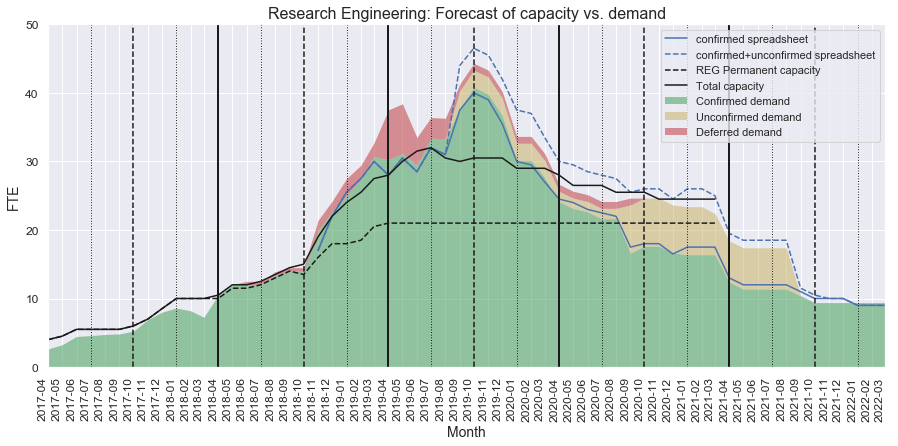

In [9]:
fig = plt.figure(figsize=(15,7))
ax = fig.gca()

to_plot.plot.area(ax=ax, label='Project Demand', x_compat=True, rot=90, alpha=0.6, color=['g','y','r'], stacked=True, linewidth=0)


confirmed_fte.plot(ax=ax, color='b', rot=90, label='confirmed spreadsheet')
total_fte.plot(ax=ax, color='b',linestyle='--', rot=90, label='confirmed+unconfirmed spreadsheet')
capacity['REG Permanent capacity'].plot(ax=ax, color='k', linestyle='--', rot=90)
capacity['Total capacity'].plot(ax=ax, color='k', rot=90)

xlim = ax.get_xlim()

#ylim = ax.get_ylim()
ylim = (0,50)

quarters = pd.date_range(start=reqs.index.min(),end=reqs.index.max(),freq='QS')
for q in quarters:
    if q.month==4:
        linestyle = '-'
        linewidth = '2'
    
    elif q.month==7:
        linestyle = ':'
        linewidth = '1'        
    
    elif q.month==10:
        linestyle = '--'
        linewidth = '1.5'        
    
    elif q.month==1:
        linestyle = ':'
        linewidth = '1'
    
    ax.plot([q, q], ylim, linestyle=linestyle, linewidth=linewidth, color='k')

# format tick labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.set_xticklabels(reqs.index.strftime("%Y-%m").values, fontsize=12)
plt.yticks(fontsize=12)

ax.legend()
ax.set_ylabel('FTE', fontsize=14)
ax.set_xlabel('Month', fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Research Engineering: Forecast of capacity vs. demand', fontsize=16);

## Queries on graph
1. Missing demand for 2017-18 (some from missing data in Forecast, some from April 2017 being dropped by `resample`)
2. Demand / Capacity mismatch 2018-19
4. Missing unconfirmed demand compared to spreadsheet
5. Capacity lines need extended to April 2022
6. Can we do a cumulative sum for all capacity except Total to get lines to match riginal plot
7. Can we separate Hut23 demand from confirmed and show as "baseline" in another colour below the remaining green confirmed demand (blue perhaps)?
8. Can we clearly mark 22 May (or 01 June if closest date that's easy to do) as "today" and add a cisual cue to spearate past from future (perhaps a white box over the past or future with alpha to "fade" it)?
9. Add Scottish Enterprise demand back in time
10. Extend Third-party and Edinburgh Safe Haven capacity if demand is solid (check with JH)
11. Can we be confident 40 FTE is expected long run average? Perhaps x-FTE per programme (based on current less TF demand) + x-FTE per partner uni (support + TF demand + proj-specific demand)
12. Add AI programme demand?


In [10]:
fc.placeholders





,archived,name,roles,updated_at,updated_by_id
id,,,,,
23092,False,Resource Required 1,[],2019-05-13 17:25:11+00:00,460554
23093,False,Newcastle 01,[],2019-05-13 17:23:15+00:00,460554
23094,False,Edinburgh 01,[],2019-05-13 17:23:15+00:00,460554
24360,False,Birmingham 01,[],2019-03-12 16:14:24+00:00,458589
24361,True,SPF RA 01,[],2019-05-13 12:47:19+00:00,460554
24677,False,Resource required 2,[],2019-05-13 17:22:39+00:00,460554
24678,True,Resource required 3,[],2019-05-13 12:53:20+00:00,460554
24679,False,Leeds 01,[],2019-05-13 15:24:48+00:00,460554
26903,False,Unconfirmed 01,[],2019-05-13 17:05:36+00:00,460554


In [11]:
reqs['2019-10']
tmp=fc.project_reqs.resample('MS').mean()['2019-10'].T
tmp.columns = ['fte']
tmp.sort_values(by='fte',ascending=False,inplace=True)

tmp.index = [fc.get_project_name(idx) for idx in tmp.index]

tmp

,fte
Living With Machines,3.1
SPF TPS 2019+,2.5
Safe Haven,2.1
Wrattler 2019-2020,2.0
UQM^3,2.0
NATS,2.0
Fusion modelling- IDEA,1.5
Team management,1.1
SPF Justice,1.0
Interpretable AI for health,1.0


,Data science at scale,Data science for science and the humanities,Data-centric engineering,Defence and security,External,Finance and economics,Health,Hut 23,Public Policy,Research Support,Seed,"Tools, Practices, and Systems",UCL,Urban analytics,Wellcome Trust
2017-06-30,0.000000,0.000000,0.334201,1.151270,0.000000,0.022910,0.137049,0.788545,0.000000,0.472561,0.329406,0.271598,0.000000,0.000000,0.000000
2017-09-29,0.000000,0.000000,0.739297,0.830000,0.000000,0.032500,0.380000,0.881250,0.000000,0.848867,0.641465,0.375000,0.000000,0.000000,0.000000
2017-12-29,0.275774,0.000000,0.722282,1.661091,0.264524,0.076925,0.414683,0.923750,0.000000,1.249901,0.694385,0.375000,0.000000,0.000000,0.000000
2018-03-30,0.423750,0.000000,0.921667,3.207083,0.393472,0.078750,0.495000,1.007639,0.000000,0.796290,0.332341,0.375000,0.000000,0.000000,0.000000
2018-06-29,0.580645,0.042339,2.750000,3.084677,0.542339,0.040323,1.298387,2.000000,0.000000,0.000000,1.008065,0.000000,0.000000,0.169355,0.000000
2018-09-28,1.089844,0.898438,2.386719,2.835938,0.500000,0.234375,0.937500,2.000000,0.000000,0.000000,1.570312,0.000000,0.000000,0.656250,0.000000
2018-12-31,2.070312,1.850000,2.796875,2.828125,0.000000,0.417969,0.278320,1.706250,0.561523,0.000000,0.710938,3.389063,0.000000,2.000000,0.000000
2019-03-29,0.500000,4.100000,3.819048,3.968254,0.250000,0.500000,1.135516,1.514286,0.881151,0.000000,0.833333,7.680952,0.000000,2.500000,0.000000
2019-06-28,0.000000,3.059016,5.573770,3.163934,0.250000,0.500000,1.297131,3.208197,0.672131,0.000000,1.061066,7.135246,0.081967,4.319672,0.000000
2019-09-30,0.000000,3.100000,7.307692,4.258462,0.250000,0.500000,2.323077,1.876923,1.000000,0.000000,0.500000,7.100000,0.250000,6.000000,0.323077


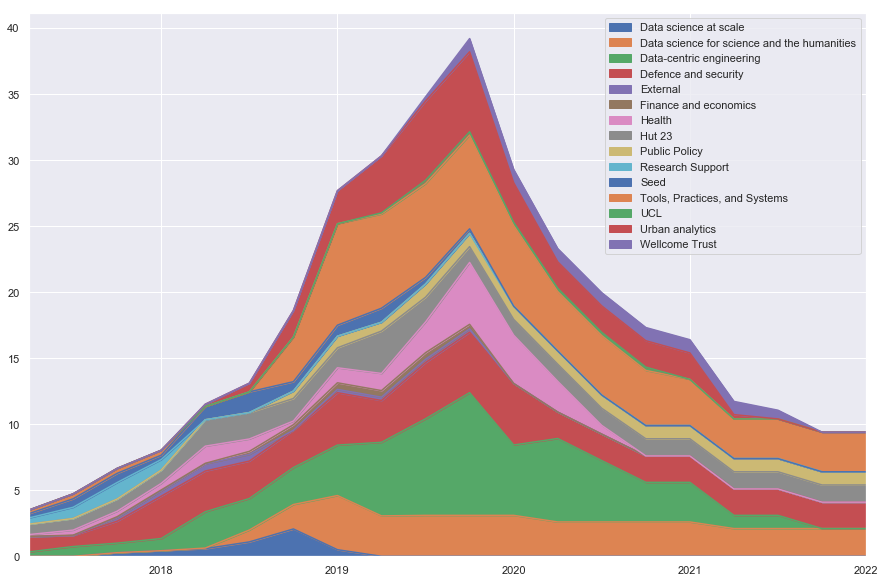

In [12]:
import numpy as np
project_ids = fc.project_reqs.copy().columns
clients=[]
for project in project_ids:
    client_id = fc.projects.loc[project, 'client_id']
    
    if not np.isnan(client_id):
        clients.append(fc.clients.loc[client_id,'name'])
    else:
        clients.append('NaN')
    

client_meanfte = fc.project_reqs.copy()
client_meanfte = client_meanfte.groupby(clients,axis=1).sum()
client_meanfte = client_meanfte.resample('BQ').mean()

client_meanfte = client_meanfte.loc[:,client_meanfte.sum()>0]

ax = plt.figure(figsize=(15,10)).gca()
client_meanfte.plot.area(ax=ax)

client_meanfte

In [13]:
fc.placeholders

,archived,name,roles,updated_at,updated_by_id
id,,,,,
23092,False,Resource Required 1,[],2019-05-13 17:25:11+00:00,460554
23093,False,Newcastle 01,[],2019-05-13 17:23:15+00:00,460554
23094,False,Edinburgh 01,[],2019-05-13 17:23:15+00:00,460554
24360,False,Birmingham 01,[],2019-03-12 16:14:24+00:00,458589
24361,True,SPF RA 01,[],2019-05-13 12:47:19+00:00,460554
24677,False,Resource required 2,[],2019-05-13 17:22:39+00:00,460554
24678,True,Resource required 3,[],2019-05-13 12:53:20+00:00,460554
24679,False,Leeds 01,[],2019-05-13 15:24:48+00:00,460554
26903,False,Unconfirmed 01,[],2019-05-13 17:05:36+00:00,460554
